In [90]:
# Imports
from logr_utils import sigmoid, logistic_sigmoid_regression, min_max_normalize

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Read the data
data = pd.read_csv('data/banking.csv')

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [91]:
# Data Preprocessing

# Drop columns 16-20
data.drop(data.columns[15:20], axis=1, inplace=True)

# Drop all 'unknown' rows
data.replace('unknown', np.nan, inplace=True)
data.dropna(inplace=True)

# Define dictionaries for month and day of the week
dict_month = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

dict_day = {
    'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6,
    'sat': 7
}

# Map month and day_of_week
data['month'] = data['month'].map(dict_month)
data['day_of_week'] = data['day_of_week'].map(dict_day)

# One-hot encoding for desired feaures
columns_to_encode = ['job', 'marital', 'education', 'default', 
                     'housing', 'loan', 'contact', 'poutcome']
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the data
encoded_data = encoder.fit_transform(data[columns_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Drop the original categorical columns
data.drop(columns=columns_to_encode, inplace=True)

# Concatenate the original DataFrame (without the dropped columns) with the encoded DataFrame
data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Intercept Term Inclusion
data.insert(0, 'intercept', 1)

data.head()

,intercept,age,month,day_of_week,duration,campaign,pdays,previous,y,job_blue-collar,...,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_yes,housing_yes,loan_yes,contact_telephone,poutcome_nonexistent,poutcome_success
0,1,28,6,5,339,3,6,2,1,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,39,4,6,185,2,999,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,55,8,6,137,1,3,1,1,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,30,7,3,68,8,999,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,37,5,5,204,1,999,0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [92]:
# Extract data for train test split
X = data.drop(columns='y')  # Features
y = data['y']  # Target variable

# Ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Sci-kit Learn Gaussian Naive Bayes implementation

# Initialize the model
naive_bayes = GaussianNB()

# Fit the model and time the training process
start_time_nb = time.time()
naive_bayes.fit(X_train, y_train)
end_time_nb = time.time()

# Measure inference time for Naive Bayes
start_inference_nb = time.time()
y_pred_nb = naive_bayes.predict(X_test)
end_inference_nb = time.time()

# Calculate metrics for Naive Bayes
nb_acc = accuracy_score(y_test, y_pred_nb)
nb_prec = precision_score(y_test, y_pred_nb, average='binary', pos_label=1)
nb_recall = recall_score(y_test, y_pred_nb, average='binary', pos_label=1)
nb_f1 = f1_score(y_test, y_pred_nb, average='binary')
nb_conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Print metrics
print("\nNaive Bayes Metrics:")
print(f"Accuracy: {nb_acc:.4f}")
print(f"Precision: {nb_prec:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F1 Score: {nb_f1:.4f}")
print("Confusion Matrix:\n", nb_conf_matrix)
print(f"Time taken for training: {end_time_nb - start_time_nb:.4f} seconds")
print(f"Time taken for inference: {end_inference_nb - start_inference_nb:.4f} seconds")


Naive Bayes Metrics:
Accuracy: 0.8549
Precision: 0.4205
Recall: 0.4511
F1 Score: 0.4352
Confusion Matrix:
 [[4872  470]
 [ 415  341]]
Time taken for training: 0.0100 seconds
Time taken for inference: 0.0030 seconds


In [94]:
# Sci-kit Learn Linear Regression implementation

# Initialize the model
logreg = LogisticRegression(max_iter=10000)

# Fit the model and time the training process
start_time_logreg = time.time()
logreg.fit(X_train, y_train)
end_time_logreg = time.time()

# Measure inference time for Logistic Regression
start_inference_logreg = time.time()
y_pred_logreg = logreg.predict(X_test)
end_inference_logreg = time.time()

# Calculate metrics for Logistic Regression
logreg_acc = accuracy_score(y_test, y_pred_logreg)
logreg_prec = precision_score(y_test, y_pred_logreg, average='binary', pos_label=1)
logreg_recall = recall_score(y_test, y_pred_logreg, average='binary', pos_label=1)
logreg_f1 = f1_score(y_test, y_pred_logreg, average='binary')
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)

# Print metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {logreg_acc:.4f}")
print(f"Precision: {logreg_prec:.4f}")
print(f"Recall: {logreg_recall:.4f}")
print(f"F1 Score: {logreg_f1:.4f}")
print("Confusion Matrix:\n", logreg_conf_matrix)
print(f"Time taken for training: {end_time_logreg - start_time_logreg:.4f} seconds")
print(f"Time taken for inference: {end_inference_logreg - start_inference_logreg:.4f} seconds")

Logistic Regression Metrics:
Accuracy: 0.8942
Precision: 0.6405
Recall: 0.3347
F1 Score: 0.4396
Confusion Matrix:
 [[5200  142]
 [ 503  253]]
Time taken for training: 4.3028 seconds
Time taken for inference: 0.0010 seconds


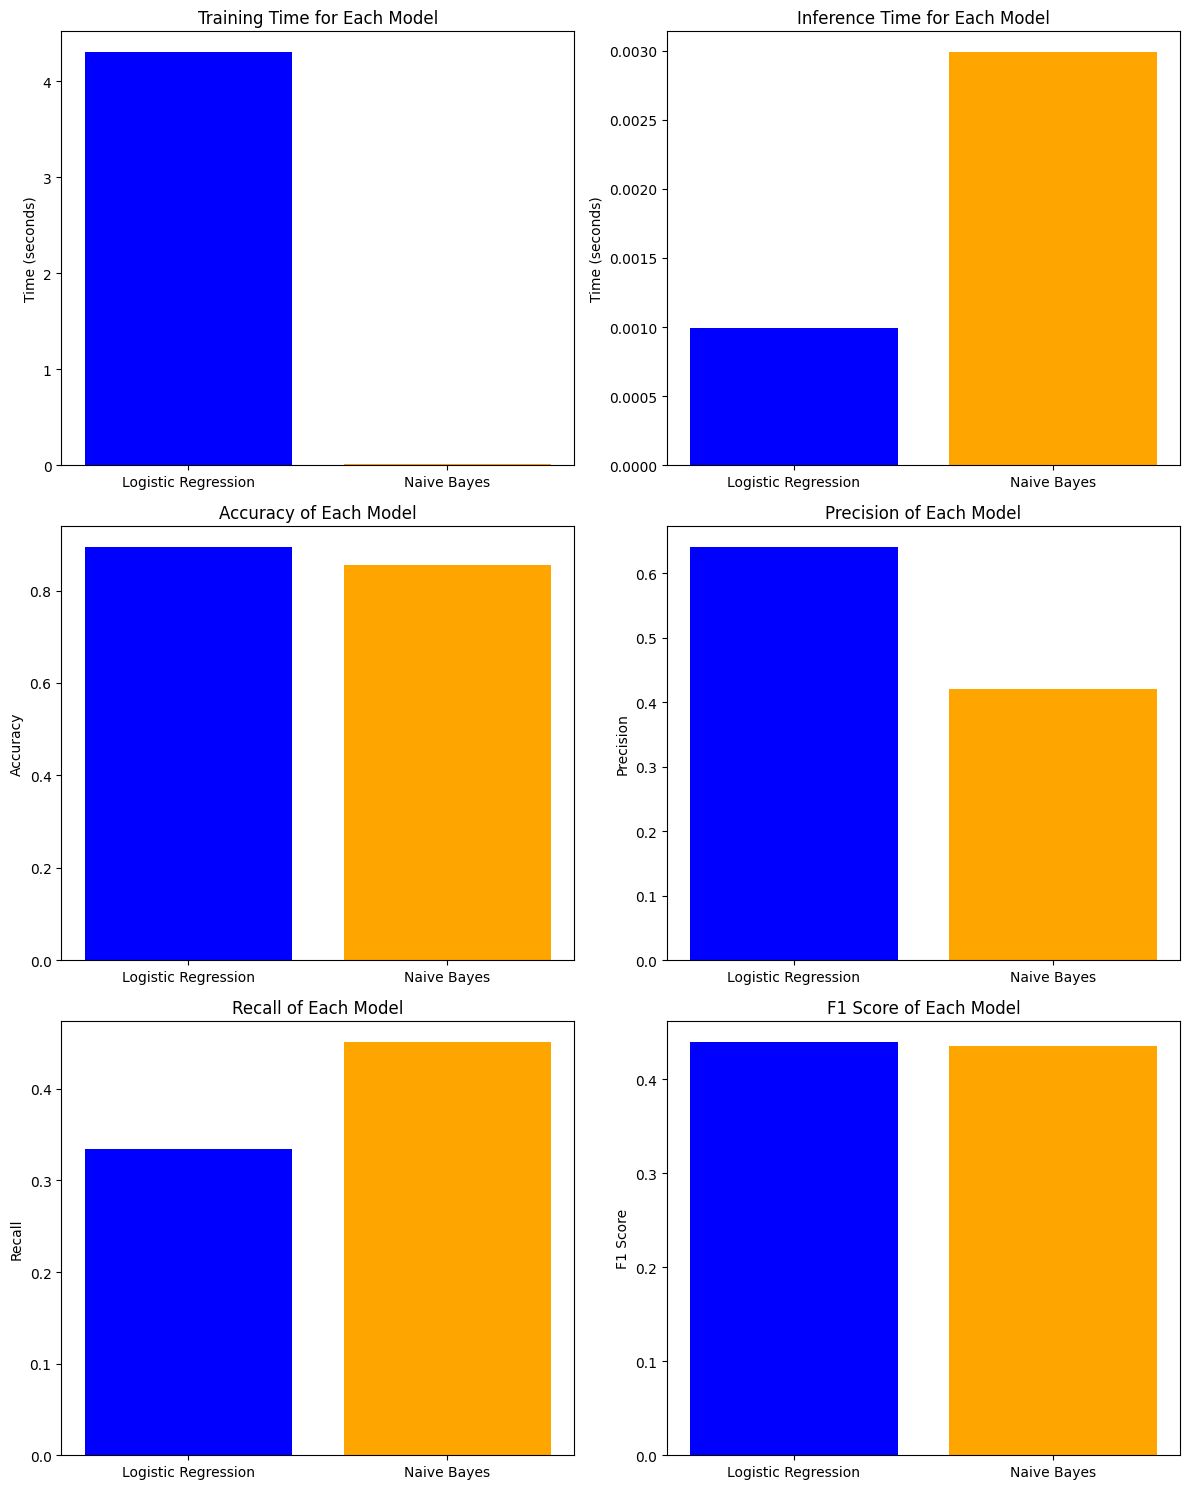

In [95]:
# Comparison: Logistic Regression vs. Naive Bayes

# Compare Metrics
models = ['Logistic Regression', 'Naive Bayes']
train_times = [end_time_logreg - start_time_logreg, end_time_nb - start_time_nb]
inference_times = [end_inference_logreg - start_inference_logreg, end_inference_nb - start_inference_nb]
accuracies = [logreg_acc, nb_acc]
precisions = [logreg_prec, nb_prec]
recalls = [logreg_recall, nb_recall]
f1_scores = [logreg_f1, nb_f1]

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

# Plotting training time
ax[0, 0].bar(models, train_times, color=['blue', 'orange'])
ax[0, 0].set_title('Training Time for Each Model')
ax[0, 0].set_ylabel('Time (seconds)')

# Plotting inference time
ax[0, 1].bar(models, inference_times, color=['blue', 'orange'])
ax[0, 1].set_title('Inference Time for Each Model')
ax[0, 1].set_ylabel('Time (seconds)')

# Plotting accuracy
ax[1, 0].bar(models, accuracies, color=['blue', 'orange'])
ax[1, 0].set_title('Accuracy of Each Model')
ax[1, 0].set_ylabel('Accuracy')

# Plotting precision
ax[1, 1].bar(models, precisions, color=['blue', 'orange'])
ax[1, 1].set_title('Precision of Each Model')
ax[1, 1].set_ylabel('Precision')

# Plotting recall
ax[2, 0].bar(models, recalls, color=['blue', 'orange'])
ax[2, 0].set_title('Recall of Each Model')
ax[2, 0].set_ylabel('Recall')

# Plotting F1 score
ax[2, 1].bar(models, f1_scores, color=['blue', 'orange'])
ax[2, 1].set_title('F1 Score of Each Model')
ax[2, 1].set_ylabel('F1 Score')

# Show plots
plt.tight_layout()
plt.show()